Для начала необходимо запустить сервер -- app.py, в данном случае -- локально (и не в ноутбуке), GET запрос идет по URL, который можно настроить resources/config.json, поумолчанию: http://127.0.0.1:5000/

In [1]:
!python3 app.py

Using CPU. Note: This module is much faster with a GPU.
 * Serving Flask app 'app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
^C


In [2]:
import client
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
plt.style.use('seaborn-white')

In [3]:
def repr_rect(points):
    xy = tuple(points[0])
    w = points[1][0] - points[0][0]
    h = points[3][1] - points[0][1]
    return xy, w, h

def repr_report(image_arr, report):
    fig, ax = plt.subplots()
    ax.imshow(image_arr)
    for el in report:
        points = el['boxes']
        xy, w, h = repr_rect(points)
        rect = patches.Rectangle(xy, w, h, linewidth=1.5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        print(f"{el['text']}:", round(el['confident'], 2))
    plt.show()

Мнимальные настройки

In [4]:
config_file = "client_config.json"
params = client.init_params(config_file)
URL = params["URL"]
URL

'http://127.0.0.1:5000/api/recognize'

Теперь можно проверить систему в действии

In [5]:
image_path = "sample.png"
image_arr = client.load_image_file(image_path)
report = client.get_recognition_report(image_arr, URL=URL)

IMAGE: 0.99
TO TEXT:: 0.51
HOW: 0.26
TO: 0.76
EXTRACT: 0.97
TEXT: 1.0
FROM: 0.89
AN IMAGE: 0.83


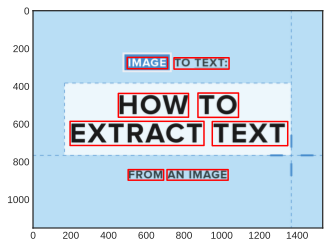

In [6]:
repr_report(image_arr, report)